# Example for calculating the overlap of two histograms

## First we create two samples of random numbers coming from a certain distribution

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

We will define 2 random samples coming from 2 different distributions and with different sample size

In [2]:
sample_1 = np.random.normal(34,8, 1000)
sample_2 = np.random.chisquare(50,500)

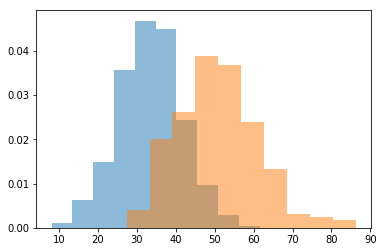

In [3]:
plt.hist(sample_1, alpha=0.5, density=True)
plt.hist(sample_2, alpha=0.5, density=True)
plt.show()

Our goal will be to come up with a measure of how much does this two distributions overlap

## Creating probability densitiy functions

We can use KDE's (Kernel Density Estimate) to get a function that approximates the probability distribtution function of each histogram

In [4]:
pdf_1 = stats.gaussian_kde(sample_1)
pdf_2 = stats.gaussian_kde(sample_2)

`pdf_1` and `pdf_1` are **functions** that can be evaluated at any point

In [5]:
print(pdf_1(4.5), pdf_1(40.0), pdf_2(62.3))

[6.57602096e-05] [0.03473959] [0.01740047]


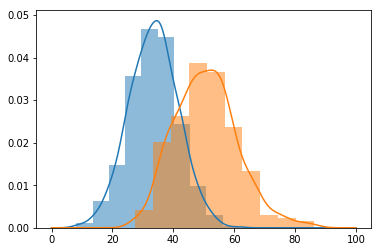

In [6]:
x = np.linspace(0, 100, 1000)
plt.hist(sample_1, alpha=0.5, density=True)
plt.hist(sample_2, alpha=0.5, density=True)
plt.plot(x, pdf_1(x), color='C0')
plt.plot(x, pdf_2(x), color='C1')
plt.show()

Now that `pdf_1` and `pdf_2` are functions we can integrate them with `scipy.integrate.quad`

In [7]:
import scipy.integrate as integrate

In [8]:
result = integrate.quad(lambda x: pdf_1(x),  -np.inf,  np.inf)
print(result[0])
result = integrate.quad(lambda x: pdf_2(x),  -np.inf,  np.inf)
print(result[0])

1.0
1.0000000000000004


These functions generated by `scipy.stats.gaussian_kde` are already normilized so that
$$ \int f_{\rm kde} (x) dx = 1.$$

However, so that we can measure an overlap we need to normalize the **square** of the function (the way it is done for wavefunctions in quantum mechanics) so that
$$ \int f^2_{\rm kde} (x) dx = 1.$$

Now we can define the overlap as
$$ \int f_{\rm kde} (x) g_{\rm kde} (x) dx$$

## Defining function that calculates the overlap of two functions

In [9]:
def overlap(f1, f2):
    # First we need to calaculate the normalization constants
    n1 = integrate.quad(lambda x: f1(x)**2,  -np.inf,  np.inf)[0]
    n2 = integrate.quad(lambda x: f2(x)**2,  -np.inf,  np.inf)[0]
    # Normalizing these functions (the quantum mechanis way) means doing the replacement f(x) -> f(x)/sqrt(N)
    # So we calculate the integral of the product and divide by sqrt(N1*N2)
    return integrate.quad(lambda x: f1(x)*f2(x),  -np.inf,  np.inf)[0]/np.sqrt(n1*n2)

### Testing the function by calculating the overlap of a function with itself

In [10]:
print(overlap(pdf_1, pdf_1))
print(overlap(pdf_2, pdf_2))

1.0
1.0


### Calculating the overlap of our two kde approximated functions

In [11]:
print(overlap(pdf_1, pdf_2))

0.4563447147614239


### Making sure that our new overlap operator commutes

In [12]:
print(overlap(pdf_2, pdf_1))

0.4563447147614239


## Based on our current examples we can define a function that takes two samples and calculates their overlaps

In [13]:
def sample_overlap(x1, x2):
    # x1 is a numpy array representing the first sample
    # x2 is a numpy array representing the second sample
    pdf1 = stats.gaussian_kde(x1)
    pdf2 = stats.gaussian_kde(x2)
    # We rely on the overlap function we defined earlier
    return overlap(pdf1, pdf2)

Just to confirm that our new function works we test it with the samples we already created and compare results

In [14]:
# Here we are using the function that takes functions as arguments
print(overlap(pdf_2, pdf_1))
# Here we are using the function that takes samples as arguments
print( sample_overlap(sample_1, sample_2))

0.4563447147614239
0.4563447147614239


## For convinience lets also define a function that plots 2 samples and their KDE's

In [17]:
def samples_hist_kde_plot(x1, x2):
    #Finding the minimum and maximum among all elements in both samples
    x_min = min(np.amin(x1), np.amin(x2))
    x_max = max(np.amax(x1), np.amax(x2))
    # Shifting the minimum a little bit to the left
    x_min -= np.abs(x_min)*.1
    # Shifting the maximum a little bit to the right
    x_max += np.abs(x_max)*.1
    # Using those min and max to create an array where the KDE's will be evaluated for plotting
    x = np.linspace(x_min, x_max, 1000)
    pdf1 = stats.gaussian_kde(x1)
    pdf2 = stats.gaussian_kde(x2)
    plt.hist(x1, alpha=0.5, density=True)
    plt.hist(x2, alpha=0.5, density=True)
    plt.plot(x, pdf1(x), color='C0')
    plt.plot(x, pdf2(x), color='C1')
    plt.show()

Testing with our current samples

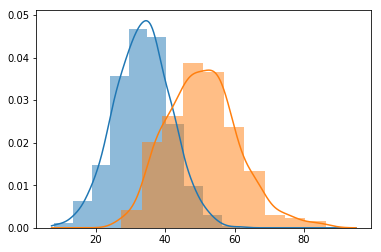

In [18]:
samples_hist_kde_plot(sample_1, sample_2)

## Now we can try other sampes
## Two samples from gaussian distributions that do not overlap

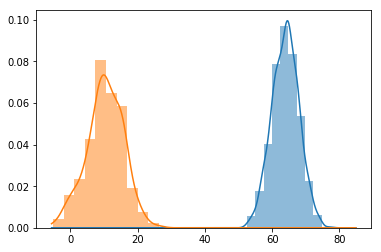

Samples overlap is: 8.524350827157328e-128


In [19]:
sample_3 = np.random.normal(64,4, 1000)
sample_4 = np.random.normal(10,5, 300)
#Notice the different sample sizes
samples_hist_kde_plot(sample_3, sample_4)
print('Samples overlap is: {}'.format(sample_overlap(sample_3, sample_4)))

## Two samples from gaussian distributions that mostly overlap

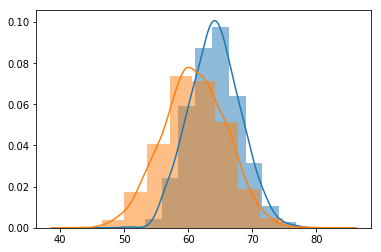

Samples overlap is: 0.8836056456720291


In [20]:
sample_5 = np.random.normal(64,4, 1000)
sample_6 = np.random.normal(61,5, 3000)
#Notice the different sample sizes
samples_hist_kde_plot(sample_5, sample_6)
print('Samples overlap is: {}'.format(sample_overlap(sample_5, sample_6)))

## Final note
This is different from the other measure we discussed that calculates the area under where both functions overlap. But that could in principle be defined in a similar fashion. However the the normalization constant and the overlap integral would have to be defined differently.

In fact, here the functions are already normizalized. All that would have to be different is the overlap integral. Not taking the product but the minimum of both fucntions at every value of x